In [1]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector

In [2]:
# file csv to panda

path_read_csv = r"" #your all path
data = pd.read_csv(path_read_csv+r"\Apprentissage_Automatique_Project\Python_files\csv_files\train_bdd_clean.csv")

In [21]:
#choose here the label you want to train for among the following list;["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"]:

label = "prct_cause_infra"


data_prct = (
    data.copy()
        .drop(
            ["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"],
            axis=1,
        )
    )

y = data[label]
X = data_prct

# Diviser le jeu de données en ensembles d'entraînement et de test

separation_date = 2023

# Masque pour les données de test (annee == 2023)
test_mask = (data['annee'] == separation_date)

# Masque pour les données d'entraînement (annee < 2023)
train_mask = (data['annee'] < separation_date)

# Séparez les données en ensembles d'entraînement et de test
X_train = data_prct[train_mask]
y_train = y[train_mask]
X_test = data_prct[test_mask]
y_test = y[test_mask]

### cas où l'on  travail sur les retards à l'arrivée tous trains. NE PAS LANCER SI ETUDE POURCENTAGES


In [11]:
#cas où l'on  travail sur les retards à l'arrivée tous trains. NE PAS LANCER SI ETUDE POURCENTAGES
nom_du_fichier = r"\Apprentissage_Automatique_Project\Python_files\csv_files\pred_retard.csv"
y = data["retard_moyen_tous_trains_arrivee"]
X = pd.read_csv(path_read_csv+nom_du_fichier)

# Diviser le jeu de données en ensembles d'entraînement et de test

separation_date = 2023

# Masque pour les données de test (annee == 2023)
test_mask = (data['annee'] == separation_date)

# Masque pour les données d'entraînement (annee < 2023)
train_mask = (data['annee'] < separation_date)

# Séparez les données en ensembles d'entraînement et de test
X_train = X[train_mask]
y_train = y[train_mask]
X_test = X[test_mask]
y_test = y[test_mask]

## Création des différentes pipeline

In [4]:
# Créer la pipeline pour la régression linéaire
linear_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('linear_regression', LinearRegression())  
])

In [5]:
# Créer la pipeline pour la régression Random Forest
random_forest_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [6]:
# Créer la pipeline pour la Support Vector Regression (SVR)
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])


In [7]:
# Créer la pipeline pour les K-plus proches voisins (K-NN) en régression
knn_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))  
])

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import tensorflow as tf

# Créez la pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de mise à l'échelle
    ('mlp', MLPRegressor(hidden_layer_sizes=(50, 25), activation='relu', solver='adam'))  # Réseau de neurones
])

# Entraînez le modèle avec la pipeline
pipeline.fit(X_train, y_train)

# Faites des prédictions
y_pred = pipeline.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
# Entraîner les modèles avec les différentes pipelines

linear_regression_pipeline.fit(X_train, y_train)
random_forest_regression_pipeline.fit(X_train, y_train)
svr_pipeline.fit(X_train, y_train)
knn_regression_pipeline.fit(X_train, y_train)
pipeline.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp', MLPRegressor(hidden_layer_sizes=(50, 25)))])

In [14]:
# Évaluer la performance des modèles de régression
linear_regression_predictions = linear_regression_pipeline.predict(X_test)
mse_linear_regression = mean_squared_error(y_test, linear_regression_predictions)
print(f"Erreur quadratique moyenne (MSE) de la régression linéaire : {mse_linear_regression:.2f}")

random_forest_mse = mean_squared_error(y_test, random_forest_regression_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : {random_forest_mse:.2f}")

svr_mse = mean_squared_error(y_test, svr_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle SVR : {svr_mse:.2f}")

knn_mse = mean_squared_error(y_test, knn_regression_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle K-plus proches voisins en régression : {knn_mse:.2f}")

nn_mse = mean_squared_error(y_test, pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle nn : {nn_mse:.2f}")

Erreur quadratique moyenne (MSE) de la régression linéaire : 11.29
Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : 12.36
Erreur quadratique moyenne (MSE) du modèle SVR : 12.41
Erreur quadratique moyenne (MSE) du modèle K-plus proches voisins en régression : 9.19
Erreur quadratique moyenne (MSE) du modèle nn : 21.49


[ 4.52964503e-01  6.34954564e-01 -2.83014272e-01  3.04651926e+00
  4.19709395e-01  1.71873633e-01  5.93356819e-01  9.95788488e-02
  1.14053164e+00  4.07545148e-01  1.39552457e+00  8.54118917e-02
 -2.99661325e-01 -9.06161253e-02  3.98149560e-01  4.29599542e-01
 -6.15523535e-01 -1.98279993e-01 -8.53184937e-01  7.29658780e-01
  7.12525625e-01  1.22077286e-01 -7.10961373e-01  1.13616267e+00
  3.04384839e-01 -1.15264258e-01 -3.38501851e-01  6.85817719e-01
  6.49196838e-01 -1.34410570e-01  6.65976299e-01  1.39937846e+00
  1.37338367e+00  1.71718018e+00  3.45693529e-01  5.68895906e-01
  2.35461380e+00  1.60023430e-01 -6.48581365e-02 -4.72699717e-01
 -3.91525845e-01 -1.45164415e-01 -2.20319877e-01 -8.69399167e-01
  1.20129571e+00  1.15509025e+00  4.81397687e-01  6.97125507e-01
 -6.47798548e-01 -6.81119764e-02  2.98112976e-01 -1.09160223e+00
  1.15568523e-01  7.82793175e-01  4.97240498e-01  5.20692277e-01
 -5.67876171e-01 -4.45546894e+00  6.63175603e-01  3.03759940e+00
  9.95613855e-01  3.70781

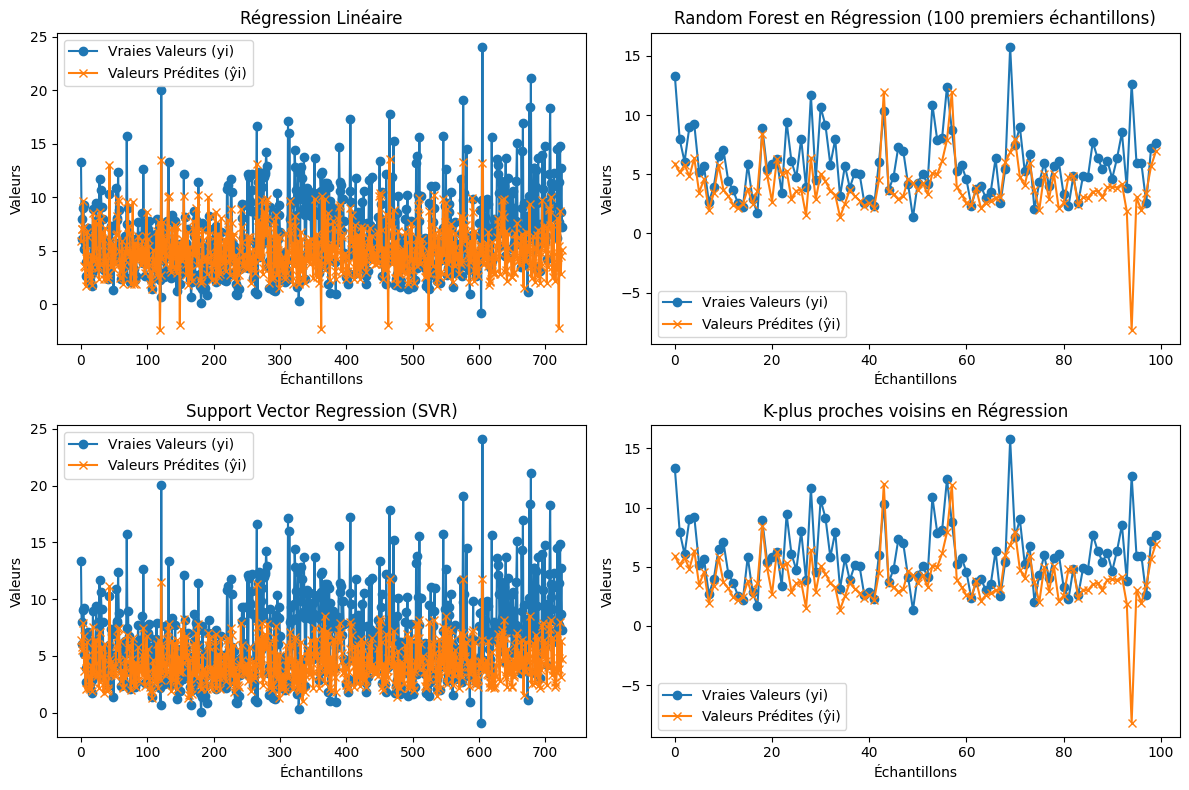

In [18]:
# Prédire les valeurs pour chaque modèle

linear_regression_predictions = linear_regression_pipeline.predict(X_test)
random_forest_predictions = random_forest_regression_pipeline.predict(X_test)
svr_predictions = svr_pipeline.predict(X_test)
knn_predictions = knn_regression_pipeline.predict(X_test)
print(svr_predictions - random_forest_predictions)
# Tracer les courbes yi vs ŷi pour chaque modèle
plt.figure(figsize=(12, 8))

# Modèle de régression linéaire
plt.subplot(221)
plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(len(y_test)), linear_regression_predictions, label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("Régression Linéaire")
plt.legend()

# Modèle Random Forest en régression
#plt.subplot(222)
#plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
#plt.plot(np.arange(len(y_test)), random_forest_predictions, label="Valeurs Prédites (ŷi)", marker='x')
#plt.xlabel("Échantillons")
#plt.ylabel("Valeurs")
#plt.title("Random Forest en Régression")
#plt.legend()

# Modèle Random Forest en régression
plt.subplot(222)
plt.plot(np.arange(100), y_test[:100], label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(100), random_forest_predictions[:100], label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("Random Forest en Régression (100 premiers échantillons)")
plt.legend()

# Modèle SVR
plt.subplot(223)
plt.plot(np.arange(len(y_test)), y_test, label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(len(y_test)), svr_predictions, label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("Support Vector Regression (SVR)")
plt.legend()

# Modèle K-plus proches voisins en régression
plt.subplot(224)
plt.plot(np.arange(100), y_test[:100], label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(100),random_forest_predictions[:100], label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("K-plus proches voisins en Régression")
plt.legend()

plt.tight_layout()
plt.show()

In [96]:
def passe():
    # Create SequentialFeatureSelector for Random Forest
    sfs = SequentialFeatureSelector(random_forest_regression_pipeline.named_steps['random_forest'],
                                    k_features='best',  # Set the number of features you want to select
                                    forward=True,
                                    floating=False,
                                    verbose=2,
                                    scoring='neg_mean_squared_error',  # Use negative MSE for feature selection
                                    cv=None)

    # Perform feature selection
    sfs.fit(X_train, y_train)

    # Get the selected feature indices
    selected_feature_indices = sfs.k_feature_idx_

    # Transform the training and test data with the selected features
    X_train_selected = X_train[:, selected_feature_indices]
    X_test_selected = X_test[:, selected_feature_indices]

    # Train the Random Forest model on the data with selected features
    random_forest_regression_pipeline.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = random_forest_regression_pipeline.predict(X_test_selected)

    # Evaluate the performance with MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE) on selected features: {mse:.2f}")



    #pb: this is way to long. (134 x 135)/2 iterations = 9045 iterations
    #other idea: first step sort features by corcoeff with label

Variance expliquée par chaque composante principale :
[0.03428622 0.02744332 0.02204784 0.02143262 0.01808204 0.01652331
 0.01549839 0.01523265 0.01438042 0.01357635 0.01300077 0.01232015
 0.01168391 0.0115118  0.01125385 0.01101289 0.01042755 0.00936465
 0.00929965 0.00898643 0.00874407 0.00868092 0.00857518 0.00843278
 0.00825272 0.00805468 0.00794565 0.00790546 0.00777797 0.00776684
 0.00773393 0.00771779 0.00769588 0.00769588 0.00769588 0.00769588
 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588
 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588
 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588
 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588
 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588
 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588
 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588
 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588 0.00769588
 0.00769

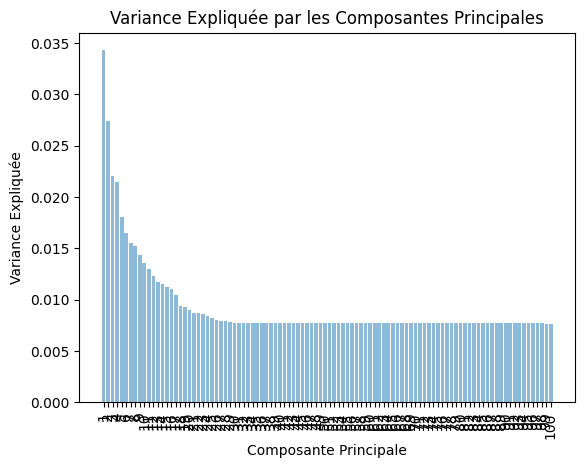

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# mise à l'échelle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=100)

# Ajustez et transformez les données
X_pca = pca.fit_transform(X_scaled)

# Les données ont maintenant été réduites en 2 composantes principales (ou le nombre que vous avez spécifié)

# composantes principales et variance expliquée
explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance)


principal_components = pca.components_
print("Composantes principales :")
print(principal_components)




# graphique à barres pour afficher les variances expliquées
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Composante Principale')
plt.ylabel('Variance Expliquée')
plt.title('Variance Expliquée par les Composantes Principales')
plt.xticks(range(1, len(explained_variance) + 1))
plt.xticks(rotation=90)
plt.show()

In [98]:


# Créez la pipeline avec la standardisation
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de mise à l'échelle des caractéristiques
    ('pca', PCA(n_components=30)),  # PCA avec le nombre de composantes que vous souhaitez
    ('regressor', RandomForestRegressor())
])

# Entraîner les modèles avec les différentes pipelines

pca_pipeline.fit(X_train, y_train)

random_forest_mse_pca = mean_squared_error(y_test, pca_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : {random_forest_mse_pca:.2f}")

#on a une moins bonne mse que sans pca, mauvaise approche

Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : 191.09


In [19]:
correlation_matrix = X.corrwith(y)

pd.set_option('display.max_rows', None)
# Afficher la matrice de corrélation
abs_mat = correlation_matrix.abs()

sorted_correlation = abs_mat.sort_values(ascending=False)

print(sorted_correlation)


Distance (km)                             0.169846
Latitude_depart                           0.109289
DEPART_ITALIE                             0.098802
national_service                          0.086960
DEPART_PARIS MONTPARNASSE                 0.069960
ARRIVEE_MARSEILLE ST CHARLES              0.068714
Longitude_arrivee                         0.064434
DEPART_MARSEILLE ST CHARLES               0.058092
DEPART_BARCELONA                          0.055957
nb_train_prevu                            0.052080
ARRIVEE_NANTES                            0.051538
DEPART_CHAMBERY CHALLES LES EAUX          0.050853
DEPART_LYON PART DIEU                     0.048937
DEPART_STRASBOURG                         0.047698
DEPART_PARIS NORD                         0.047050
ARRIVEE_TOURCOING                         0.047004
DEPART_TOULOUSE MATABIAU                  0.042423
ARRIVEE_LILLE                             0.041921
ARRIVEE_MARNE LA VALLEE                   0.041797
DEPART_MADRID                  

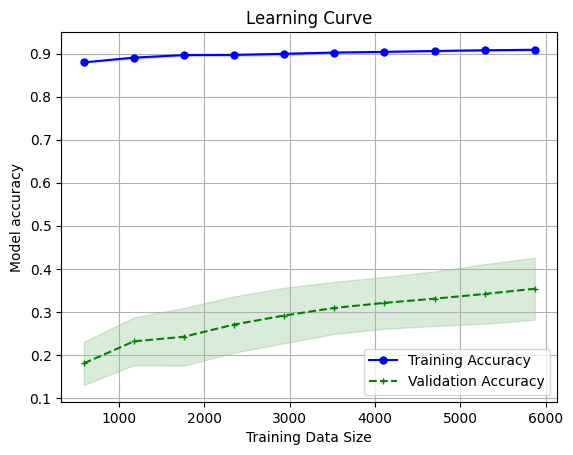

In [100]:
from sklearn.model_selection import learning_curve

# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=random_forest_regression_pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définissez une grille d'hyperparamètres que vous souhaitez tester
param_grid = {
    'random_forest__n_estimators': [10, 50, 100],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}

model = random_forest_regression_pipeline

# Créez l'objet GridSearchCV avec la métrique appropriée (négatif de l'erreur quadratique moyenne)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Effectuez la recherche sur grille en ajustant le modèle aux données
grid_search.fit(X, y)

# Obtenez les meilleurs hyperparamètres et la meilleure performance (négatif de l'erreur quadratique moyenne)
best_params = grid_search.best_params_
best_performance = -grid_search.best_score_

# Imprimez les résultats
print("Meilleurs hyperparamètres:", best_params)
print("Meilleure performance (MSE négatif):", best_performance)

In [102]:
from xgboost import XGBRegressor

# Créez la pipeline
XGB_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de mise à l'échelle (si nécessaire)
    ('xgb', XGBRegressor(objective='reg:squarederror'))  # Modèle XGBoost pour la régression
])

# Entraînez le modèle avec la pipeline
XGB_pipeline.fit(X_train, y_train)

# Faites des prédictions
y_pred = XGB_pipeline.predict(X_test)

XGB_mse = mean_squared_error(y_test, XGB_pipeline.predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle XGB : {XGB_mse:.2f}")

Erreur quadratique moyenne (MSE) du modèle XGB : 153.14


In [103]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Créez des listes pour stocker les scores et les valeurs de k
best_scores = []
best_ks = []
best_mse = np.inf  # Initialisez la meilleure MSE à une valeur maximale

# Choisissez la plage de valeurs de k à explorer (par exemple, de 1 à nombre_de_features)
for k in range(1, len(X.columns) + 1):
    # Créez la pipeline avec la nouvelle valeur de k
    random_forest_regression_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Étape de mise à l'échelle
        ('feature_selection', SelectKBest(score_func=f_regression, k=k)),  # Sélection des caractéristiques
        ('regressor', RandomForestRegressor())  # Modèle de régression
    ])

    # Entraînez le modèle avec la pipeline
    random_forest_regression_pipeline.fit(X_train, y_train)

    # Évaluez le modèle en calculant la MSE
    y_pred = random_forest_regression_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Mettez à jour la meilleure MSE et la meilleure valeur de k si nécessaire
    if mse < best_mse:
        best_mse = mse
        best_k = k

    # Ajoutez la MSE actuelle et la valeur de k aux listes
    best_scores.append(mse)
    best_ks.append(k)

# Créez un graphique de l'évolution de la MSE en fonction de k
plt.figure()
plt.plot(best_ks, best_scores, marker='o')
plt.title("Évolution de la MSE en fonction de k")
plt.xlabel("Valeur de k")
plt.ylabel("MSE")
plt.grid(True)

# Trouvez la valeur de k où la MSE est minimale
min_mse_k = best_ks[np.argmin(best_scores)]
min_mse = min(best_scores)

# Tracez un point à l'emplacement de la MSE minimale
plt.scatter(min_mse_k, min_mse, color='red', label=f'Min MSE (k={min_mse_k})')

# Affichez la légende
plt.legend()

# Affichez le graphique
plt.show()

# Affichez la meilleure valeur de k et la meilleure MSE
print("Meilleur k:", min_mse_k)
print("Meilleure MSE:", min_mse)



201.96368914013993
200.7578286667914
194.4866848090072
194.06719613102703
192.19573805933223
179.45321194282502
178.28476072588447
175.83140664294584
171.31231107570036
169.81435906313175
160.3465042463936
155.31970736055587
153.92854624678813
153.31467949496343
152.25714221850086
151.15305622002765
Meilleur k: 102
Meilleure MSE: 151.15305622002765


In [104]:
#On va donc garder un modèle de random forest pour cette regression, que l'on va essayer d'optimiser ici:

# file csv to panda

nom_du_fichier_csv = r'\Apprentissage_Automatique_Project\Python_files\csv_files\train_bdd_clean.csv'
data = pd.read_csv(path_read_csv+nom_du_fichier_csv)

#choose here the label you want to train for among the following list;["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"]:

label = "prct_cause_infra"


data_prct = (
    data.copy()
        .drop(
            ["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"],
            axis=1,
        )
    )

y = data[label]
X = data_prct

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#selection des meilleurs features

import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Créez des listes pour stocker les scores et les valeurs de k
best_scores = []
best_ks = []
best_mse = np.inf  # Initialisez la meilleure MSE à une valeur maximale

# Choisissez la plage de valeurs de k à explorer (par exemple, de 1 à nombre_de_features)
for k in range(1, len(X.columns) + 1):
    # Créez la pipeline avec la nouvelle valeur de k
    random_forest_regression_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Étape de mise à l'échelle
        ('feature_selection', SelectKBest(score_func=f_regression, k=k)),  # Sélection des caractéristiques
        ('regressor', RandomForestRegressor())  # Modèle de régression
    ])

    # Entraînez le modèle avec la pipeline
    random_forest_regression_pipeline.fit(X_train, y_train)

    # Évaluez le modèle en calculant la MSE
    y_pred = random_forest_regression_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Mettez à jour la meilleure MSE et la meilleure valeur de k si nécessaire
    if mse < best_mse:
        best_mse = mse
        best_k = k

    # Ajoutez la MSE actuelle et la valeur de k aux listes
    best_scores.append(mse)
    best_ks.append(k)

# Créez un graphique de l'évolution de la MSE en fonction de k
plt.figure()
plt.plot(best_ks, best_scores, marker='o')
plt.title("Évolution de la MSE en fonction de k")
plt.xlabel("Valeur de k")
plt.ylabel("MSE")
plt.grid(True)

# Trouvez la valeur de k où la MSE est minimale
min_mse_k = best_ks[np.argmin(best_scores)]
min_mse = min(best_scores)

# Tracez un point à l'emplacement de la MSE minimale
plt.scatter(min_mse_k, min_mse, color='red', label=f'Min MSE (k={min_mse_k})')

# Affichez la légende
plt.legend()

# Affichez le graphique
plt.show()

# Affichez la meilleure valeur de k et la meilleure MSE
print("Meilleur k:", min_mse_k)
print("Meilleure MSE:", min_mse)

